# COVIT-19 Data Analisys

## Get Public DataSets for COVIT-19
Extract last data published

In [1]:
import urllib
import datetime
dt = datetime.datetime.today()
year = dt.strftime('%Y')
month = dt.strftime('%m')
day = dt.strftime('%d')
# Mundial Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{year}-{month}-{day}.xlsx'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

# Mapped Data
#outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Confirmed.csv'
#url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
#print(url_of_file)
#urllib.request.urlretrieve(url_of_file, outfilename)
#outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Death.csv'
#url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
#print(url_of_file)
#urllib.request.urlretrieve(url_of_file, outfilename)
#outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Recovered.csv'
#url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
#print(url_of_file)
#urllib.request.urlretrieve(url_of_file, outfilename)

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-28.xlsx


('COVIT-19-2020328.xls', <http.client.HTTPMessage at 0x2c458e9ea08>)

## Prepare and Clean Data
Build DataSet to work

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read Data
dt = datetime.datetime.today()
file = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
df = pd.read_excel(file)

# Prepare Dataset
data = pd.DataFrame(df, columns= ['dateRep', 'day','month', 'year', 'cases', 'deaths', 'countriesAndTerritories'])
data = data.rename(columns={"dateRep": "Date", "countriesAndTerritories": "Country", "cases":"Cases", "deaths": "Deaths", "month": "Month", "day": "Day"})

# Filter Dataset
data = data[data['Cases'] > 0]
data['Period'] = data['Month']*100+data['Day']
data = data.sort_values(['Country', 'Date'], ascending=[True, True])

# Index DataSet
data['Id'] = data.groupby(['Country']).cumcount()

# Prepare data
ant = data.iloc[0]['Cases']
antd = data.iloc[0]['Deaths']
ants = 0
country = data.iloc[0]['Country']
i = 0
c = [] # cases
d = [] # deaths
s = [] # start deaths
p = [] # impact

death = False
for i in range(i, len(data)):

  # Validate start first death
  if country == data.iloc[i]['Country']:
    if death == False and data.iloc[i]['Deaths'] > 0:
      death = True
  else:
    death = False

  # Sumarize
  Cases = (data.iloc[i]['Cases'] + (ant if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Cases']
  Deaths = (data.iloc[i]['Deaths'] + (antd if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Deaths']
  StartDeaths = 1 if country == data.iloc[i]['Country'] and death else 0
  Impact = Deaths / (0 if Cases == 0 else Cases) * 100
  
  
  # Append cases
  c.append(Cases)
  d.append(Deaths)
  s.append(StartDeaths)
  p.append(Impact)
  ant = Cases
  antd = Deaths
  ants = StartDeaths
  country = data.iloc[i]['Country']

data["Total_Cases"] = c
data["Total_Deaths"] = d
data['StartDeaths'] = s
data['Impact'] = p


# Index DataSet start by deaths
data = data[data['StartDeaths'] == 1]
data['Id'] = data.groupby(['Country']).cumcount()

data.head(50)

Date  Day  Month  year  Cases  Deaths      Country  Period  Id  \
4   2020-03-24   24      3  2020      6       1  Afghanistan     324   0   
3   2020-03-25   25      3  2020      2       0  Afghanistan     325   1   
2   2020-03-26   26      3  2020     33       0  Afghanistan     326   2   
0   2020-03-28   28      3  2020     16       1  Afghanistan     328   3   
102 2020-03-12   12      3  2020      1       1      Albania     312   0   
101 2020-03-13   13      3  2020     12       0      Albania     313   1   
100 2020-03-14   14      3  2020     10       0      Albania     314   2   
99  2020-03-15   15      3  2020      5       0      Albania     315   3   
98  2020-03-16   16      3  2020      4       0      Albania     316   4   
97  2020-03-17   17      3  2020      9       0      Albania     317   5   
96  2020-03-18   18      3  2020      4       0      Albania     318   6   
95  2020-03-19   19      3  2020      4       1      Albania     319   7   
94  2020-03-20   20      3  2020     11       0      Albania     320   8   
92  2020-03-22   22      3  2020      6       0      Albania     322   9   
91  2020-03-23   23      3  2020     13       0      Albania     323  10   
90  2020-03-24   24      3  2020     11       2      Albania     324  11   
89  2020-03-25   25      3  2020     23       1      Albania     325  12   
88  2020-03-26   26      3  2020     23       0      Albania     326  13   
87  2020-03-27   27      3  2020     28       1      Albania     327  14   
86  2020-03-28   28      3  2020     12       3      Albania     328  15   
152 2020-03-13   13      3  2020      4       1      Algeria     313   0   
151 2020-03-14   14      3  2020      2       1      Algeria     314   1   
150 2020-03-15   15      3  2020     11       0      Algeria     315   2   
149 2020-03-16   16      3  2020     11       2      Algeria     316   3   
148 2020-03-17   17      3  2020     12       0      Algeria     317   4   
146 2020-03-19   19      3  2020     13       1      Algeria     319   5   
145 2020-03-20   20      3  2020      9       1      Algeria     320   6   
144 2020-03-21   21      3  2020     12       3      Algeria     321   7   
142 2020-03-23   23      3  2020      8       5      Algeria     323   8   
141 2020-03-24   24      3  2020     87       2      Algeria     324   9   
140 2020-03-25   25      3  2020     42       0      Algeria     325  10   
139 2020-03-26   26      3  2020     33       0      Algeria     326  11   
138 2020-03-27   27      3  2020     41       4      Algeria     327  12   
107 2020-03-27   27      3  2020     36       3      Andorra     327   0   
106 2020-03-28   28      3  2020     43       0      Andorra     328   1   
234 2020-03-08    8      3  2020      1       1    Argentina     308   0   
233 2020-03-09    9      3  2020      3       0    Argentina     309   1   
232 2020-03-11   11      3  2020      7       0    Argentina     311   2   
231 2020-03-13   13      3  2020     12       0    Argentina     313   3   
230 2020-03-14   14      3  2020      3       1    Argentina     314   4   
229 2020-03-15   15      3  2020     11       0    Argentina     315   5   
228 2020-03-16   16      3  2020     11       0    Argentina     316   6   
227 2020-03-17   17      3  2020      9       0    Argentina     317   7   
226 2020-03-18   18      3  2020     14       0    Argentina     318   8   
225 2020-03-19   19      3  2020     18       0    Argentina     319   9   
224 2020-03-20   20      3  2020     31       1    Argentina     320  10   
223 2020-03-21   21      3  2020     30       0    Argentina     321  11   
127 2020-03-22   22      3  2020     67       1    Argentina     322  12   
126 2020-03-23   23      3  2020     41       0    Argentina     323  13   
125 2020-03-24   24      3  2020     35       0    Argentina     324  14   

     Total_Cases  Total_Deaths  StartDeaths     Impact  
4             40             1            1   2.500000  
3             42   

# Compare Virus Propagation Mexico vs Spain, Italy and EU By days
Compare COVIT-19 propagation in Mexico with Spain, Italy and EU

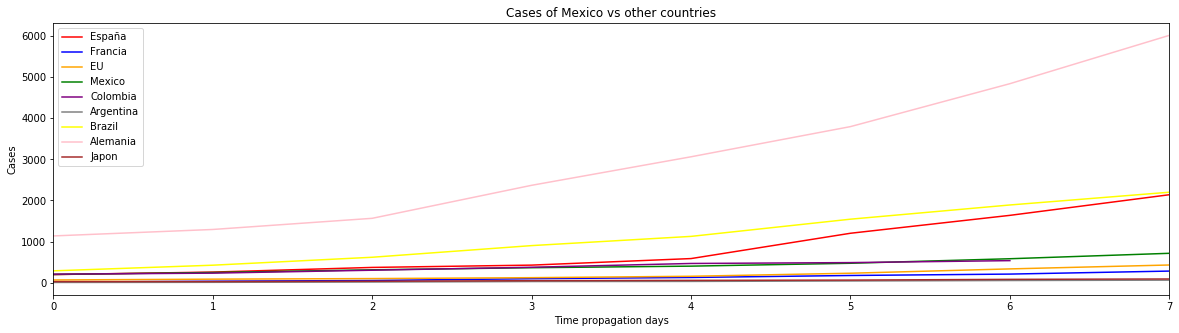

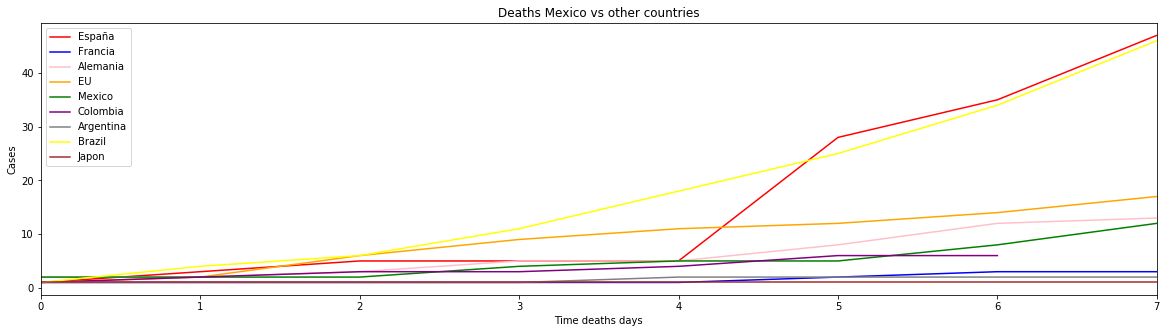

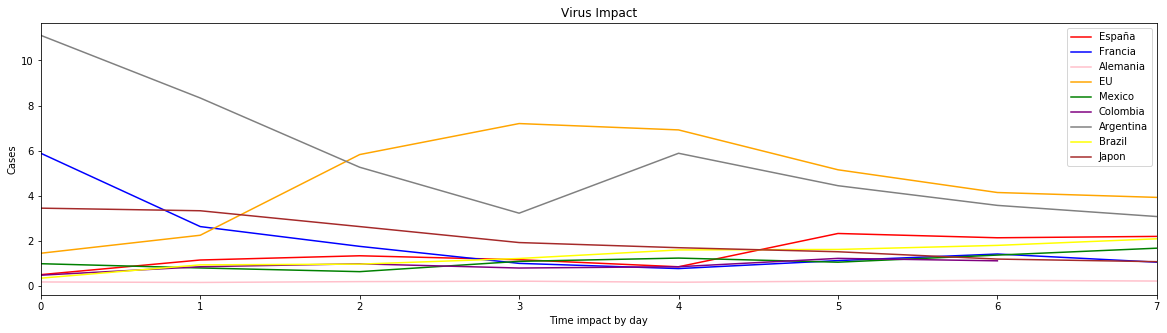

Date  Day  Month  year  Cases  Deaths Country  Period  Id  \
4386 2020-03-21   21      3  2020     39       2  Mexico     321   0   
4385 2020-03-22   22      3  2020     48       0  Mexico     322   1   
4384 2020-03-23   23      3  2020     65       0  Mexico     323   2   
4383 2020-03-24   24      3  2020     51       2  Mexico     324   3   
4382 2020-03-25   25      3  2020     38       1  Mexico     325   4   
4381 2020-03-26   26      3  2020     70       0  Mexico     326   5   
4380 2020-03-27   27      3  2020    110       3  Mexico     327   6   
4379 2020-03-28   28      3  2020    132       4  Mexico     328   7   

      Total_Cases  Total_Deaths  StartDeaths    Impact  
4386          203             2            1  0.985222  
4385          251             2            1  0.796813  
4384          316             2            1  0.632911  
4383          367             4            1  1.089918  
4382          405             5            1  1.234568  
4381          475             5            1  1.052632  
4380          585             8            1  1.367521  
4379          717            12            1  1.673640

In [11]:
# Filter by country
mexico = data[(data['Country'] == 'Mexico')]
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] < len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] < len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] < len(mexico) ]
colombia = data[(data['Country'] == 'Colombia')]
colombia = colombia[colombia['Id'] < len(mexico) ]
argentina = data[(data['Country'] == 'Argentina')]
argentina = argentina[argentina['Id'] < len(mexico) ]
brazil = data[(data['Country'] == 'Brazil')]
brazil = brazil[brazil['Id'] < len(mexico) ]
germany = data[(data['Country'] == 'Germany')]
germany = germany[germany['Id'] < len(mexico)]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] < len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] < len(mexico)]

#result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
#result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
#result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases of Mexico vs other countries', figsize=(20,5), label="España")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, figsize=(20,5), label="Francia")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Cases', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Cases', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Cases', color='yellow', ax=ax, label="Brazil")
germany.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths Mexico vs other countries', figsize=(20,5), label="España")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")
germany.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Deaths', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Deaths', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Deaths', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Deaths', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, title='Virus Impact', figsize=(20,5), label="España")
france.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, label="Francia")
germany.plot(kind='line',x='Id',y='Impact', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Impact', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Impact', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Impact', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Impact', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Impact', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Impact', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time impact by day")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

mexico.head(50)

#result_compare.head(50)

# Future propagation days in other countries

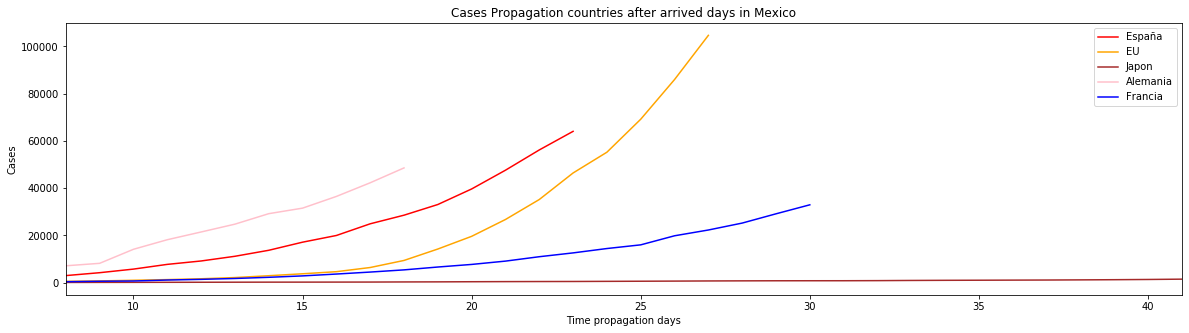

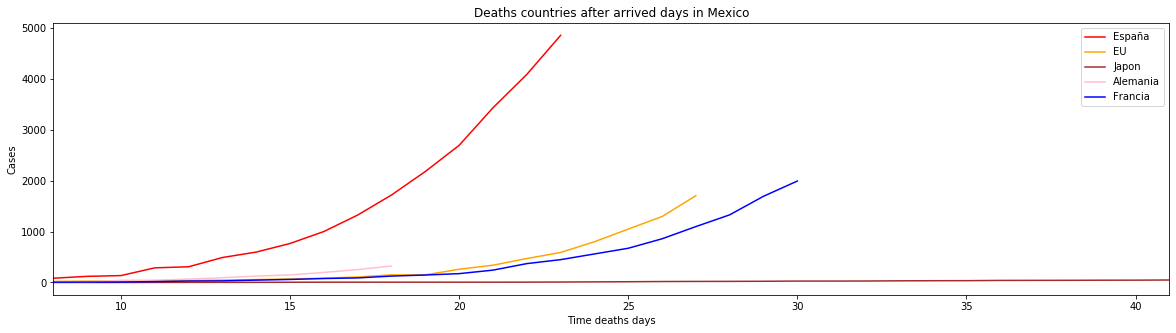

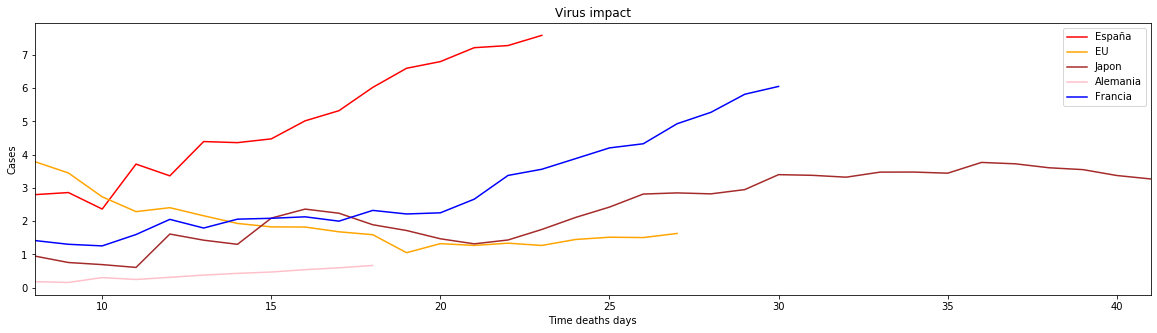

Date  Day  Month  year  Cases  Deaths Country  Period  Id  \
3695 2020-02-22   22      2  2020     12       0   Japan     222   8   
3694 2020-02-23   23      2  2020     27       0   Japan     223   9   
3693 2020-02-24   24      2  2020     12       0   Japan     224  10   
3691 2020-02-26   26      2  2020     20       0   Japan     226  11   
3690 2020-02-27   27      2  2020     22       2   Japan     227  12   
3689 2020-02-28   28      2  2020     24       0   Japan     228  13   
3688 2020-02-29   29      2  2020     20       0   Japan     229  14   
3687 2020-03-01    1      3  2020      9       2   Japan     301  15   
3686 2020-03-02    2      3  2020     15       1   Japan     302  16   
3684 2020-03-04    4      3  2020     14       0   Japan     304  17   
3683 2020-03-05    5      3  2020     49       0   Japan     305  18   
3682 2020-03-06    6      3  2020     32       0   Japan     306  19   
3681 2020-03-07    7      3  2020     59       0   Japan     307  20   
3680 2020-03-08    8      3  2020     47       0   Japan     308  21   
3679 2020-03-09    9      3  2020     33       1   Japan     309  22   
3678 2020-03-10   10      3  2020     26       2   Japan     310  23   
3677 2020-03-11   11      3  2020     54       3   Japan     311  24   
3676 2020-03-12   12      3  2020     51       3   Japan     312  25   
3675 2020-03-13   13      3  2020     56       4   Japan     313  26   
3674 2020-03-14   14      3  2020     62       2   Japan     314  27   
3673 2020-03-15   15      3  2020     43       1   Japan     315  28   
3672 2020-03-16   16      3  2020     34       2   Japan     316  29   
3671 2020-03-17   17      3  2020     10       4   Japan     317  30   
3670 2020-03-18   18      3  2020      5       0   Japan     318  31   
3669 2020-03-19   19      3  2020     44       1   Japan     319  32   
3668 2020-03-20   20      3  2020     77       4   Japan     320  33   
3667 2020-03-21   21      3  2020     57       2   Japan     321  34   
3666 2020-03-22   22      3  2020     39       1   Japan     322  35   
3665 2020-03-23   23      3  2020     43       5   Japan     323  36   
3664 2020-03-24   24      3  2020     39       1   Japan     324  37   
3663 2020-03-25   25      3  2020     65       1   Japan     325  38   
3662 2020-03-26   26      3  2020     75       2   Japan     326  39   
3661 2020-03-27   27      3  2020     96       1   Japan     327  40   
3660 2020-03-28   28      3  2020    135       3   Japan     328  41   

      Total_Cases  Total_Deaths  StartDeaths    Impact  
3695          105             1            1  0.952381  
3694          132             1            1  0.757576  
3693          144             1            1  0.694444  
3691          164             1            1  0.609756  
3690          186             3            1  1.612903  
3689          210             3            1  1.428571  
3688          230             3            1  1.304348  
3687          239             5            1  2.092050  
3686          254             6            1  2.362205  
3684          268             6            1  2.238806  
3683          317             6            1  1.892744  
3682          349             6            1  1.719198  
3681          408             6            1  1.470588  
3680          455             6            1  1.318681  
3679          488             7            1  1.434426  
3678          514             9            1  1.750973  
3677          568            12            1  2.112676  
3676          619            15            1  2.423263  
3675          675            19            1  2.814815  
3674          737            21            1  2.849389  
3673          780            22            1  2.820513  
3672          814            24            1  2.948403  
3671          824            28            1  3.398058  
3670          829            28            1  3.377563  
3669          873            29            1  3.321879  
3668    

In [12]:
# Filter by country
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] >= len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] >= len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] >= len(mexico) ]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] >= len(mexico)]
china = data[(data['Country'] == 'China')]
china = china[china['Id'] >= len(mexico)]
german = data[(data['Country'] == 'Germany')]
german = german[german['Id'] >= len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] >= len(mexico)]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases Propagation countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, title='Virus impact', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Impact', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Impact', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Impact', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

japan.head(50)

# Worse of Cases

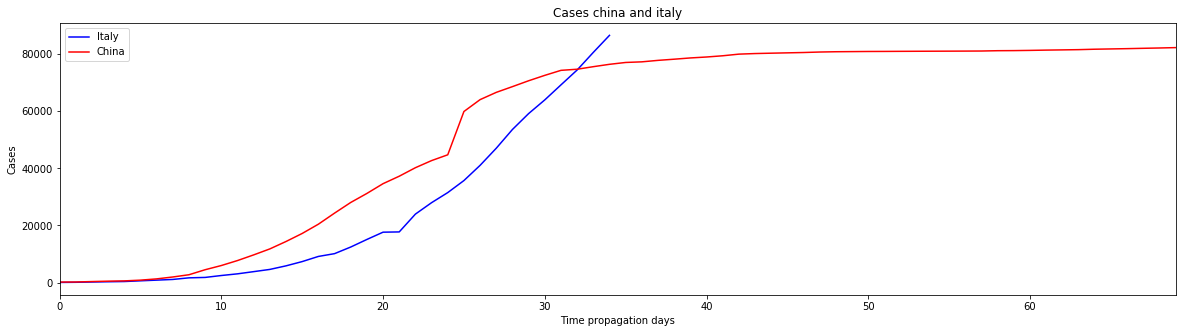

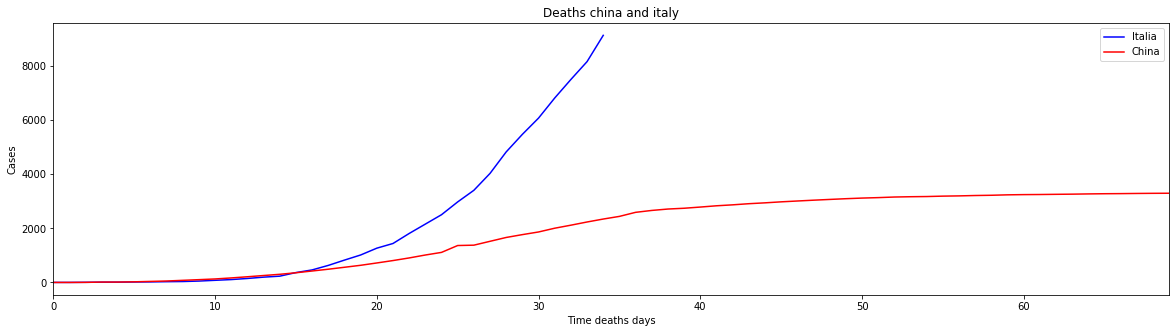

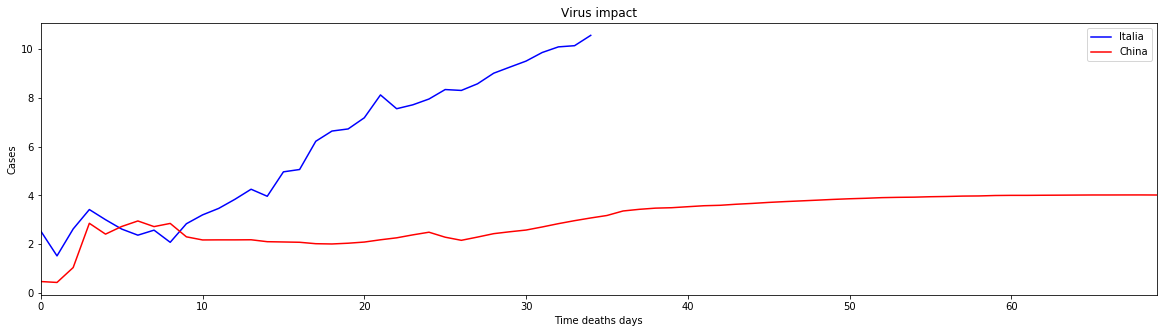

Date  Day  Month  year  Cases  Deaths Country  Period  Id  \
3589 2020-02-23   23      2  2020     62       2   Italy     223   0   
3588 2020-02-24   24      2  2020     53       0   Italy     224   1   
3587 2020-02-25   25      2  2020     97       4   Italy     225   2   
3586 2020-02-26   26      2  2020     93       5   Italy     226   3   
3585 2020-02-27   27      2  2020     78       1   Italy     227   4   
3584 2020-02-28   28      2  2020    250       5   Italy     228   5   
3583 2020-02-29   29      2  2020    238       4   Italy     229   6   
3582 2020-03-01    1      3  2020    240       8   Italy     301   7   
3581 2020-03-02    2      3  2020    561       6   Italy     302   8   
3580 2020-03-03    3      3  2020    146      17   Italy     303   9   
3579 2020-03-04    4      3  2020    667      28   Italy     304  10   
3578 2020-03-05    5      3  2020    587      27   Italy     305  11   
3577 2020-03-06    6      3  2020    769      41   Italy     306  12   
3576 2020-03-07    7      3  2020    778      49   Italy     307  13   
3575 2020-03-08    8      3  2020   1247      36   Italy     308  14   
3574 2020-03-09    9      3  2020   1492     133   Italy     309  15   
3573 2020-03-10   10      3  2020   1797      98   Italy     310  16   
3572 2020-03-11   11      3  2020    977     167   Italy     311  17   
3571 2020-03-12   12      3  2020   2313     196   Italy     312  18   
3570 2020-03-13   13      3  2020   2651     189   Italy     313  19   
3569 2020-03-14   14      3  2020   2547     252   Italy     314  20   
3568 2020-03-15   15      3  2020     90     173   Italy     315  21   
3567 2020-03-16   16      3  2020   6230     370   Italy     316  22   
3566 2020-03-17   17      3  2020   4000     347   Italy     317  23   
3565 2020-03-18   18      3  2020   3526     347   Italy     318  24   
3564 2020-03-19   19      3  2020   4207     473   Italy     319  25   
3563 2020-03-20   20      3  2020   5322     429   Italy     320  26   
3562 2020-03-21   21      3  2020   5986     625   Italy     321  27   
3561 2020-03-22   22      3  2020   6557     795   Italy     322  28   
3560 2020-03-23   23      3  2020   5560     649   Italy     323  29   
3559 2020-03-24   24      3  2020   4789     601   Italy     324  30   
3558 2020-03-25   25      3  2020   5249     743   Italy     325  31   
3557 2020-03-26   26      3  2020   5210     685   Italy     326  32   
3556 2020-03-27   27      3  2020   6153     660   Italy     327  33   
3555 2020-03-28   28      3  2020   5959     971   Italy     328  34   

      Total_Cases  Total_Deaths  StartDeaths     Impact  
3589           79             2            1   2.531646  
3588          132             2            1   1.515152  
3587          229             6            1   2.620087  
3586          322            11            1   3.416149  
3585          400            12            1   3.000000  
3584          650            17            1   2.615385  
3583          888            21            1   2.364865  
3582         1128            29            1   2.570922  
3581         1689            35            1   2.072232  
3580         1835            52            1   2.833787  
3579         2502            80            1   3.197442  
3578         3089           107            1   3.463904  
3577         3858           148            1   3.836185  
3576         4636           197            1   4.249353  
3575         5883           233            1   3.960564  
3574         7375           366            1   4.962712  
3573         9172           464            1   5.058875  
3572        10149           631            1   6.217361  
3571        12462           827            1   6.636174  
3570        15113          1016            1   6.722689  
3569        17660          1268            1   7.180068  
3568        17750          1441            1   8.118310  
3567        23980          1811            1   7.552127  
3566        27980         

In [13]:
# Filter by country
italy = data[(data['Country'] == 'Italy')]
china = data[(data['Country'] == 'China')]

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, title='Cases china and italy', figsize=(20,5), label="Italy")
china.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, label="China")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, title='Deaths china and italy', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Impact', color='blue', ax=ax, title='Virus impact', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Impact', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

italy.head(50)

## Evolution of the Virus
Next days virus propagation

In [0]:
# Building

# Test for build interactive Dashboard



In [0]:
from IPython.display import display
from IPython.html.widgets import *
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
  print(text.value)

text.on_submit(handle_submit)

def f(x):
  print(x)

interact(f,x=10)